

Driverless cars are getting closer to reality and at a faster pace than ever. But it is still a bit far fetched dream to have one in your garage. For the time being, there are still a lot of combustion and hybrid cars that roar around the road, for some it chills. Though the overall data on sales of automobiles shows a huge drop in sales in the last couple of years, cars are still a big attraction for many. Cars are more than just a utility for many. They are often the pride and status of the family. We all have different tastes when it comes to owning a car or at least when thinking of owning one.

Well here of course as the name suggests we are not concentrating on a new car, rather our interest is in knowing the prices of used cars across the country whether it is a royal l luxury sedan or a cheap budget utility vehicle. In this hackathon, you will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

Size of training set: 6,019 records

Size of test set: 1,234 records

FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('D:\datasets+minipro\machine hack\Participants_Data_Used_Cars\Data_Train.xlsx')
dfte=pd.read_excel('D:\datasets+minipro\machine hack\Participants_Data_Used_Cars\Data_Test.xlsx')

In [3]:
# Moving on to the other metrics, we will correct the feature values as per below strategy

#     Remove the New_price currency unit from each value and convert into relevant amount
#     Remove the Engine capacity unit from each value
#     Remove the Mileage unit and comvert all "0.0 kmpl" value to NaN

#     Remove the units of Power and convert "null bhp" to NaN

#     After all this filtering, we will fill the missing values with the mean or median value respective to each feature

In [4]:
df['data']='train'
dfte['data']='test'
dfte['Price']=np.nan

In [5]:
dff=pd.concat([df,dfte],axis=0)
dff=dff.reset_index(drop=True)

In [6]:
# dff.drop(['Name'],axis=1,inplace=True)
dff['brand'] = dff['Name'].apply(lambda x: " ".join(x.split(' ')[:1]))

In [7]:
# Define function to correct the New_Price value
def price_correct(x):
    if str(x).endswith('Lakh'):
        return float(str(x).split()[0])*100000
    elif str(x).endswith('Cr'):
        return float(str(x).split()[0])*10000000
    else:
        return x

In [8]:
# dff2=dff.copy()
# dff2['New_Price']=dff2['New_Price'].apply(price_correct)
dff['New_Price']=dff['New_Price'].apply(price_correct)

dff['New_Price'] = dff.groupby('brand').New_Price.apply(lambda x: x.fillna(x.mean()))
dff.New_Price = dff.New_Price.fillna(dff.New_Price.mean())

In [9]:
# dff[dff['Mileage'].isnull()] # 2 values with null mileage.so its fine!

In [10]:
for i in ['Location','Year','Fuel_Type','Transmission','Owner_Type']:
    print(i,':')
    print(dff[i].value_counts(),'\n')

Location :
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64 

Year :
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64 

Fuel_Type :
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64 

Transmission :
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64 

Owner_Type :
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64 



In [11]:
cat_cols=dff.select_dtypes(include='object').columns
cat_cols=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [12]:
# reomving the infrequent responses from the column ie >10 and deleting it. 
for col in cat_cols:
    freqs=dff[col].value_counts()
    k=freqs.index[freqs>10][:-1]    # checking atleast 10 responses, 20 comes after checking the data
    for cat in k:
        name=col+'_'+cat
        dff[name]=(dff[col]==cat).astype(int)
    del dff[col]
    print(col)

Location
Fuel_Type
Transmission
Owner_Type


In [13]:
a=dff['Mileage'].str.split(' ',expand=True)

a[0]=a[0].astype('float')

dff['Mileage']=a[0]

In [14]:
for i in ['Engine','Power']:
    dff[i]=dff[i].str.extract('([0-9]).*',expand=False).astype('float')

In [15]:
print(dff[dff['Mileage']==0.0].shape[0])
print(dff['Mileage'].isnull().sum())

81
2


In [16]:
dff['Mileage']=dff['Mileage'].replace({0.0:np.nan})

In [17]:
for i in ['Power','Mileage','Engine','Seats']:
    dff.loc[dff[i].isnull(),i]=dff.loc[dff['data']=='train',i].median()

In [18]:
dff.isnull().sum() # the price column in which null values are present are from test data!
# so dont worry about the 1234 null values.

Engine                    0
Kilometers_Driven         0
Mileage                   0
Name                      0
New_Price                 0
Power                     0
Price                  1234
Seats                     0
Year                      0
data                      0
brand                     0
Location_Mumbai           0
Location_Hyderabad        0
Location_Kochi            0
Location_Coimbatore       0
Location_Pune             0
Location_Delhi            0
Location_Kolkata          0
Location_Chennai          0
Location_Jaipur           0
Location_Bangalore        0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Fuel_Type_CNG             0
Transmission_Manual       0
Owner_Type_First          0
Owner_Type_Second         0
Owner_Type_Third          0
dtype: int64

In [19]:
dff.drop(['Name','brand'],axis=1,inplace=True)

In [20]:
# Separating train and test data back to their original dataframes.

df=dff[dff['data']=='train']
del df['data']

dfte=dff[dff['data']=='test']
dfte.drop(['Price','data'],axis=1,inplace=True)

C:\Users\DOMAIN\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [21]:
del dff

### Modelling:

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, BaggingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from scipy.stats import ttest_ind, ttest_1samp, levene, f_oneway, bartlett, shapiro, mannwhitneyu
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

E:\anaconda navigator\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 1 - Linear Regression:

In [23]:
X = df.drop('Price', axis=1)
y = df['Price']

lr = LinearRegression()
model = lr.fit(X, y)



model.score(X, y)

y_pred = model.predict(X)


print('R² of data:', r2_score(y, y_pred))
print('RMSE of data:', np.sqrt(mean_squared_error(y, y_pred)))

R² of data: 0.7061093337013191
RMSE of data: 6.064654396140225


#### Linear Regression base model (OLS)

In [24]:
X = df.drop(['Price','Location_Mumbai','Location_Jaipur','Location_Pune','Location_Kolkata',
             'Owner_Type_First','Kilometers_Driven','Location_Kochi','Owner_Type_Second','Location_Delhi','Location_Chennai'], axis=1)
y = df['Price']

Xc=sm.add_constant(X)
model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     1020.
Date:                Sat, 14 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:03:50   Log-Likelihood:                -19410.
No. Observations:                6019   AIC:                         3.885e+04
Df Residuals:                    6004   BIC:                         3.895e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2339.4626     55.750    -41.963      0.000   -2448.753   -2230.172
Engine                  0.2571      0.041      6.261      0.000       0.177       0.338
Mileage                -0.5709      0.032    -17.666      0.000      -0.634      -0.508
New_Price            2.684e-06    4.9e-08     54.773      0.000    2.59e-06    2.78e-06
Power                   0.0449      0.034      1.319      0.187      -0.022       0.112
Seats                  -0.3956      0.129     -3.061      0.002      -0.649      -0.142
Year                    1.1702      0.028     42.037      0.000       1.116       1.225
Location_Hyderabad      1.3035      0.246      5.288      0.000       0.820       1.787
Location_Coimbatore     1.9918      0.266      7.482      0.000       1.470       2.514
Location_Bangalore      1.9591      0.337      5.809      0.000       1.298       2.620
Fuel_Type_Diesel        1.5097      1.773      0.852      0.394      -1.966       4.985
Fuel_Type_Petrol       -1.8007      1.767     -1.019      0.308      -5.265       1.664
Fuel_Type_CNG           0.9585      1.949      0.492      0.623      -2.863       4.780
Transmission_Manual    -2.1944      0.244     -8.995      0.000      -2.673      -1.716
Owner_Type_Third        2.2123      0.597      3.707      0.000       1.043       3.382
==============================================================================
Omnibus:                     4882.465   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373270.537
Skew:                           3.357   Prob(JB):                         0.00
Kurtosis:                      40.991   Cond. No.                     2.31e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1-KNN regressor: [ Scaling is needed as it deals with distance ]

In [25]:
X = df.drop(['Price','Location_Mumbai','Location_Jaipur','Location_Pune','Location_Kolkata',
             'Owner_Type_First','Kilometers_Driven','Location_Kochi','Owner_Type_Second','Location_Delhi','Location_Chennai'], axis=1)
y = df['Price']

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

knn = KNeighborsRegressor()
knn_params = {'n_neighbors':np.arange(3,20), 'weights':['uniform','distance']}
gscv = GridSearchCV(knn, knn_params, cv=3, scoring='neg_mean_squared_error')
X_scaled = sc.fit_transform(X)
gscv.fit(X_scaled, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [27]:
knn_best=gscv.best_params_

In [28]:
knn = KNeighborsRegressor(**knn_best)
kfold = KFold(shuffle=True, n_splits=3, random_state=0)
cv_results = cross_val_score(knn, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error')
print('%s : %f(%f)' %('KNeighborsRegressor:',np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))

KNeighborsRegressor: : 4.903515(0.246984)


In [29]:
KNN = KNeighborsRegressor(**knn_best)
knn.fit(X,y)
knn.score(X,y)

0.9934057174567167

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=8)

In [31]:
knn = KNeighborsRegressor(**knn_best)
knn.fit(X_train,y_train)
y_tr_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

# training data & testing data accuracy:
print('r2_score on training data: ',r2_score(y_train,y_tr_pred)) #train
print('r2_score on testing data: ',r2_score(y_test,y_test_pred)) #test

# RMSE for train & test:
print('RMSE on training data: ',np.sqrt(mean_squared_error(y_train,y_tr_pred)))  #train
print('RMSE on testing data: ',np.sqrt(mean_squared_error(y_test,y_test_pred))) #test

r2_score on training data:  0.9945367852279479
r2_score on testing data:  0.9036644027172169
RMSE on training data:  0.8346650612586951
RMSE on testing data:  3.3376819465236482


In [32]:
pd.concat([y_test.reset_index(drop=True),pd.DataFrame(y_test_pred,columns=['y_test_pred'])],axis=1).sample(10)

,Price,y_test_pred
731,2.32,2.000000
659,7.25,8.321765
58,2.90,1.717068
219,51.43,51.350000
77,2.65,2.775000
336,7.50,6.924045
1006,14.50,11.083333
735,6.26,5.601448
533,4.00,5.502632
655,6.80,5.925000


### 2-Decision Tree regressor:

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
X = df.drop(['Price','Location_Mumbai','Location_Jaipur','Location_Pune','Location_Kolkata',
             'Owner_Type_First','Kilometers_Driven','Location_Kochi','Owner_Type_Second','Location_Delhi','Location_Chennai'], axis=1)
y = df['Price']

In [35]:
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,15), 'min_samples_leaf':np.arange(2,15)}
rscv_dt =RandomizedSearchCV(dt, dt_params, cv=3, scoring='neg_mean_squared_error')
rscv_dt.fit(X, y)
print(rscv_dt.best_params_)

{'min_samples_leaf': 10, 'max_depth': 10}


In [36]:
dt_best=rscv_dt.best_params_

In [37]:
dt=DecisionTreeRegressor(**dt_best)

dt.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
dt.score(X,y)

0.8852549343576487

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=18)


dt=DecisionTreeRegressor(**dt_best)

dt.fit(X_train,y_train)
y_tr_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

# training data & testing data accuracy:
print('r2_score on training data: ',r2_score(y_train,y_tr_pred)) #train
print('r2_score on testing data: ',r2_score(y_test,y_test_pred)) #test

# RMSE for train & test:
print('RMSE on training data: ',np.sqrt(mean_squared_error(y_train,y_tr_pred)))  #train
print('RMSE on testing data: ',np.sqrt(mean_squared_error(y_test,y_test_pred))) #test

r2_score on training data:  0.9805427552212824
r2_score on testing data:  0.9662540593271798
RMSE on training data:  1.5629969579883953
RMSE on testing data:  2.0387241798344116


In [40]:
pd.concat([y_test.reset_index(drop=True),pd.DataFrame(y_test_pred,columns=['y_test_pred'])],axis=1).sample(10)

,Price,y_test_pred
491,4.50,4.750000
101,6.75,5.625000
1127,2.75,3.208000
549,5.50,5.500000
56,6.00,6.215000
729,8.25,8.375000
991,28.63,34.627173
849,9.95,7.727609
1133,8.25,8.325000
754,5.86,5.860000


### 3 - Random Forest Regressor:

In [41]:
X = df.drop(['Price','Location_Mumbai','Location_Jaipur','Location_Pune','Location_Kolkata',
             'Owner_Type_First','Kilometers_Driven','Location_Kochi','Owner_Type_Second','Location_Delhi','Location_Chennai'], axis=1)
y = df['Price']

mse_bias= []
mse_var=[]
for n_e in np.arange(5,13):
    RF=RandomForestRegressor(n_estimators=n_e,random_state=0)
    kfold = KFold(shuffle=True, n_splits=3, random_state=0)
    mse = cross_val_score(RF, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error' )
    mse_bias.append(np.mean(np.sqrt(np.abs(mse))))
    mse_var.append(np.var(np.sqrt(np.abs(mse)), ddof=1))

In [42]:
print(np.argmin(mse_bias), np.min(mse_bias)) #best bias error at index 
print(np.argmin(mse_var), np.min(mse_var)) # best variance error at index 16

2 4.01236367259429
0 0.35588654249210594


In [43]:
print(mse_var[np.argmin(mse_bias)]) #var error for corresponding 7 index:bias 4.63,var 0.13
print(mse_bias[np.argmin(mse_var)]) #bias error for corresponding 5 index:bias 4.9,var 0.04,so we will go with n_estimator 1

print('bias tradeoff in percentage: ',((4.9-4.63)/4.9)*100) # for 5% increase in bias we are getting almost 70% reduction in variance
print('variance tradeoff in percentage: ',((.13-0.04)/.13)*100)

0.41538394508743137
4.082757335948315
bias tradeoff in percentage:  5.510204081632662
variance tradeoff in percentage:  69.23076923076923


In [44]:
RF=RandomForestRegressor(n_estimators=8,random_state=1)
RF.fit(X,y)
RF.score(X,y)

0.9739115446026624

In [45]:
RF=RandomForestRegressor(n_estimators=8,random_state=1)
RF.fit(X_train,y_train)
y_tr_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

# training data & testing data accuracy:
print('r2_score on training data: ',r2_score(y_train,y_tr_pred)) #train
print('r2_score on testing data: ',r2_score(y_test,y_test_pred)) #test

# RMSE for train & test:
print('RMSE on training data: ',np.sqrt(mean_squared_error(y_train,y_tr_pred)))  #train
print('RMSE on testing data: ',np.sqrt(mean_squared_error(y_test,y_test_pred))) #test

r2_score on training data:  0.9805427552212824
r2_score on testing data:  0.9662540593271798
RMSE on training data:  1.5629969579883953
RMSE on testing data:  2.0387241798344116


In [46]:
pd.concat([y_test.reset_index(drop=True),pd.DataFrame(y_test_pred,columns=['y_test_pred'])],axis=1).sample(10)

,Price,y_test_pred
924,9.65,11.570000
845,2.65,2.933333
930,3.75,3.700000
710,6.11,9.903684
41,9.75,6.995910
611,5.35,5.606000
288,4.30,4.300000
1182,5.90,6.228000
126,2.25,2.650000
500,6.20,5.950000


### 4 - Ada boosting DT:

In [47]:
dt=DecisionTreeRegressor(**dt_best)
AB_DT = AdaBoostRegressor(base_estimator=dt, random_state=0)
mse_bias= []
mse_var=[]
for n_e in np.arange(5,13):
    AB_DT=AdaBoostRegressor(n_estimators=n_e,random_state=0)
    kfold = KFold(shuffle=True, n_splits=3, random_state=0)
    mse = cross_val_score(AB_DT, X, y, cv=kfold, scoring='neg_mean_squared_error' )
    mse_bias.append(np.mean(np.sqrt(np.abs(mse))))
    mse_var.append(np.var(np.sqrt(np.abs(mse)), ddof=1))
print(np.min(mse_bias))
print(np.argmin(mse_bias))
print(np.min(mse_var))
print(np.argmin(mse_var))

5.650413221039403
6
0.2081483746340459
7


In [48]:
print(mse_var[7])  #variance at index 6,meaning n_estimator=3
print(mse_bias[1]) #bias at index 1,minimum variance
print('bias tradeoff in percentage: ',((7.21-6.83)/7.21)*100) # for 5% increase in bias we are getting almost 70% reduction in variance
print('variance tradeoff in percentage: ',((0.01081-0.00747)/0.01081)*100)

0.2081483746340459
5.754453278325241
bias tradeoff in percentage:  5.270457697642162
variance tradeoff in percentage:  30.89731729879741


### 5- Ada boosted RF:

In [49]:
RF=RandomForestRegressor(n_estimators=8,random_state=1)
AB_RF = AdaBoostRegressor(base_estimator=RF,random_state=0)
mse_bias= []
mse_var=[]
for n_e in np.arange(5,13):
    AB_RF=AdaBoostRegressor(n_estimators=n_e,random_state=0)
    kfold = KFold(shuffle=True, n_splits=3, random_state=0)
    mse = cross_val_score(AB_RF, X, y, cv=kfold, scoring='neg_mean_squared_error' )
    mse_bias.append(np.mean(np.sqrt(np.abs(mse))))
    mse_var.append(np.var(np.sqrt(np.abs(mse)), ddof=1))
print(np.min(mse_bias))
print(np.argmin(mse_bias))
print(np.min(mse_var))
print(np.argmin(mse_var))

5.650413221039403
6
0.2081483746340459
7


In [50]:
print(mse_var[7])  #variance at index 2,meaning n_estimator=3
print(mse_bias[1]) #bias at index 1,minimum variance.Both are almost same.
# Almost same bias and variance,so we wont use adaboosted dt regressor!

0.2081483746340459
5.754453278325241


In [51]:
# Almost same bias and variance,so we wont use adaboosted dt/RF regressor!

### 6 - Gradient Boosting: [ Uses DT by default ]

In [52]:
X = df.drop(['Price','Location_Mumbai','Location_Jaipur','Location_Pune','Location_Kolkata',
             'Owner_Type_First','Kilometers_Driven','Location_Kochi','Owner_Type_Second','Location_Delhi','Location_Chennai'], axis=1)
y = df['Price']

In [53]:
# mse_var=[]
# mse_bias = []
# GBoost=GradientBoostingRegressor()
# for ne in np.arange(1,50):
#     kfold = KFold(shuffle=True,n_splits=3,random_state=0)
#     mse = cross_val_score(GBoost, X, y, cv=kfold, scoring='neg_mean_squared_error')
#     mse_var=[].append(np.var(np.sqrt(np.abs(mse)), ddof=1))
#     mse_bias.append(np.mean(np.sqrt(np.abs(mse))))
    
# print(np.min(mse_bias))
# print(np.argmin(mse_bias))
# print(np.min(mse_var))
# print(np.argmin(mse_var))

# combined result of all:

In [54]:
KNN = KNeighborsRegressor(**knn_best)
DT =DecisionTreeRegressor(**dt_best)
RF = RandomForestRegressor(n_estimators=1,random_state=0,criterion='mae')
AB_RF = AdaBoostRegressor(base_estimator=RF,n_estimators=2,random_state=0)
AB_DT = AdaBoostRegressor(base_estimator=DT,n_estimators=2,random_state=0)
# GBoost = GradientBoostingRegressor(n_estimators=21)

In [55]:
models = []
models.append(('KNNRegressor',KNN))
models.append(('DT_Regressor',DT))
models.append(('RF_Regressor',RF))
models.append(('AdaBoostRF',AB_RF))
models.append(('AdaBoostDT',AB_DT))
# models.append(('GradientBoostRegressor',GBoost))

KNNRegressor: 4.903515 (0.246984)
DT_Regressor: 4.525640 (0.387462)
RF_Regressor: 5.394974 (0.019371)
AdaBoostRF: 5.785658 (0.077559)
AdaBoostDT: 4.945712 (0.521529)


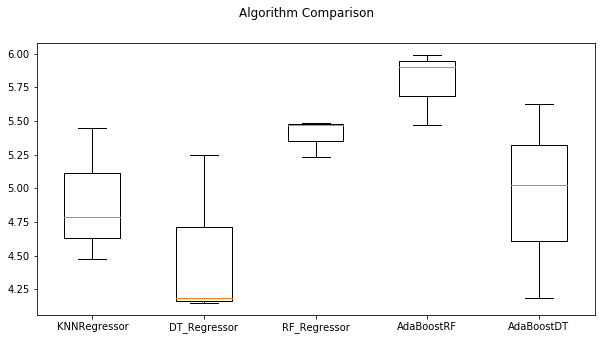

In [56]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = cross_val_score(model, X_scaled, y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [57]:
# As ,we can observe from above comparison DT is giving us best results in terms of bias and variance.
# So,we can use DT as our best model.
# we can probably create a stacked model,using Voting Regressor.

# Final testing on test dataset:

In [58]:
X_trainf = df.drop(['Price','Location_Mumbai','Location_Jaipur','Location_Pune','Location_Kolkata',
             'Owner_Type_First','Kilometers_Driven','Location_Kochi','Owner_Type_Second','Location_Delhi','Location_Chennai'], axis=1)
y_trainf = df['Price']

In [59]:
X.shape

(6019, 14)

In [60]:
dfte=dfte.drop(['Location_Mumbai','Location_Jaipur','Location_Pune','Location_Kolkata','Owner_Type_First','Kilometers_Driven','Location_Kochi','Owner_Type_Second','Location_Delhi','Location_Chennai'], axis=1)

In [61]:
dfte.shape

(1234, 14)

In [62]:
dt=DecisionTreeRegressor(**dt_best)
dt.fit(X_trainf,y_trainf)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [63]:
test_pred=dt.predict(dfte)
test_pred=pd.DataFrame(test_pred,columns=['test_data_f_pred'])

In [64]:
test_pred.sample(10)

,test_data_f_pred
454,20.235000
816,3.760417
328,5.470556
161,8.473200
268,12.663333
309,13.600909
1092,4.323000
664,11.259000
166,2.437109
173,2.413830


In [65]:
test_pred=test_pred.round(2)

# Sample data testing:

In [66]:
test_pred.to_excel('D:\datasets+minipro\machine hack\Participants_Data_Used_Cars\cjfinal.xlsx')